<a href="https://colab.research.google.com/github/PavanChintha/Machine-Learning/blob/main/3_Linear_Regression_labsession_2_normal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CSEDUT-ML Course**
## Laboratory Session 3: 05/02/2022
### Time: 16:30 - 18:00 (1 hr 30 mins)
### Difficulty Level: Normal
<hr>
<hr>

Things covered in this tutorial

* Linear Regression
    * Simple Linear Regression
    * Linear Regression Visualisation
* Polynomial Regression (Basis Function Regression)
* Gaussian Basis Function
* Weather Prediction using Linear Regression


# Linear Regresssion

Linear regression models are a good starting point for [regression](https://en.wikipedia.org/wiki/Regression_analysis) tasks. Such models are popular because they can be fit very quickly, and are very interpretable. You are probably familiar with the simplest form of a linear regression model (i.e., fitting a straight line to data) but such models can be extended to model more complicated data behavior!

In this section, we will start with a quick intuitive walk-through of the mathematics behind this well-known problem.

We begin with the standard imports:

In [2]:
# Library for matrix manipulation
# Documentation: https://numpy.org/doc/stable/
import numpy as np
%matplotlib inline
# Libraries for creating plots in python
# Documentation: https://matplotlib.org/stable/
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Method for performing Linear Regression
# Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression


import pandas as pd

## Simple Linear Regression

We will start with the most familiar linear regression, a straight-line fit to data.
A straight-line fit is a model of the form
$$
y = ax + b
$$
where $a$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept*.

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

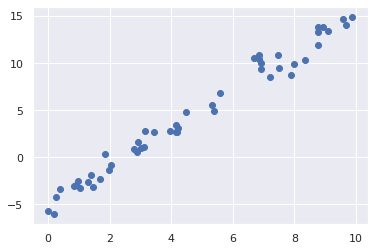

In [4]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y)

We can use Scikit-Learn's ``LinearRegression`` estimator to fit this data and construct the best-fit line:

Text(0, 0.5, 'Y Values')

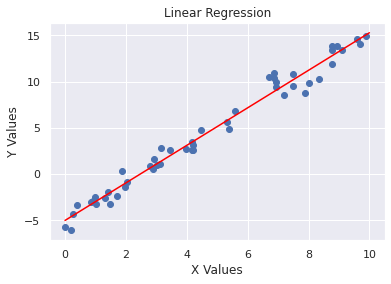

In [5]:
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, color='red')
plt.title('Linear Regression')
plt.xlabel('X Values')
plt.ylabel('Y Values')

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore.
Here the relevant parameters are ``coef_`` and ``intercept_``:

In [6]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.0272088103606953
Model intercept: -4.998577085553204


The ``LinearRegression`` estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
where there are multiple $x$ values.
Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.

The multidimensional nature of such regressions makes them more difficult to visualize, but we can see one of these fits in action by building some example data, using NumPy's matrix multiplication operator:

In [ ]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(f'Model intercept: {model.intercept_}')
print(f'Model Coefficients: {model.coef_}')
# TODO: Add a 3D visualization

Model intercept: 0.5000000000000051
Model Coefficients: [ 1.5 -2.   1. ]


Here the $y$ data is constructed from three random $x$ values, and the linear regression recovers the coefficients used to construct the data.

In this way, we can use the single ``LinearRegression`` estimator to fit lines, planes, or hyperplanes to our data.
It still appears that this approach would be limited to strictly linear relationships between variables, but it turns out we can relax this as well.

# Linear Regression Visualisations

## Gradient Descent for Simple Linear Regression

![linear regression GD visualisation](https://miro.medium.com/max/700/1*tXBtjkYLd01c25EbnXCvow.gif)

## Gradient Descent for Simple Linear Regression in 3D

![linear regression in 3D](https://miro.medium.com/max/700/1*OG1d4edy5BFYeQ0yHjBOJA.gif)

Source: https://towardsdatascience.com/gradient-descent-animation-1-simple-linear-regression-e49315b24672

# Visualizing the Regression Plane


## Regression Plane along with various parameters
![Various Parameters](https://miro.medium.com/max/700/1*AFGGAF1vlM9j1-hqRn8o5g.gif)


## Regression Plane along with the contour plot
![Contour Plot](https://miro.medium.com/max/700/1*j171iCmPHKmiYz_tbHBPXg.gif)


## Regression Plane along with the surface plot
![Surface Plot](https://miro.medium.com/max/700/1*xFr8is01v7M9LHNgThTq8g.gif)

Source: https://towardsdatascience.com/animations-of-multiple-linear-regression-with-python-73010a4d7b11

# Polynomial Regression (Basis Function Regression)

One trick you can use to adapt linear regression to nonlinear relationships between variables is to transform the data according to *basis functions*.

The idea is to take our multidimensional linear model:
$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$
and build the $x_1, x_2, x_3,$ and so on, from our single-dimensional input $x$.
That is, we let $x_n = f_n(x)$, where $f_n()$ is some function that transforms our data.

For example, if $f_n(x) = x^n$, our model becomes a polynomial regression:
$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$
Notice that this is *still a linear model*—the linearity refers to the fact that the coefficients $a_n$ never multiply or divide each other.
What we have effectively done is taken our one-dimensional $x$ values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between $x$ and $y$. An interesting explaination: https://stats.stackexchange.com/a/92087.

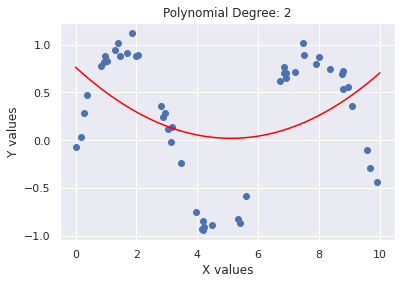

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


def polynomial_regression(degree, num_data_points=50):
    poly_model = make_pipeline(
        PolynomialFeatures(degree),
        LinearRegression(),
    )
    # Creating data (using sine wave) with random noise
    rng = np.random.RandomState(1)
    x = 10 * rng.rand(num_data_points)
    y = np.sin(x) + 0.1 * rng.randn(num_data_points)

    # Fitting the model and plotting the resulting non-linear boundary
    poly_model.fit(x[:, np.newaxis], y)
    yfit = poly_model.predict(xfit[:, np.newaxis])
    plt.scatter(x, y)
    plt.plot(xfit, yfit, color='red')
    plt.title(f'Polynomial Degree: {degree}')
    plt.xlabel(f'X values')
    plt.ylabel(f'Y values')
    return None

polynomial_regression(2)

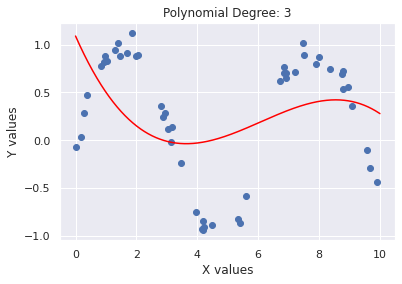

In [ ]:
polynomial_regression(3)

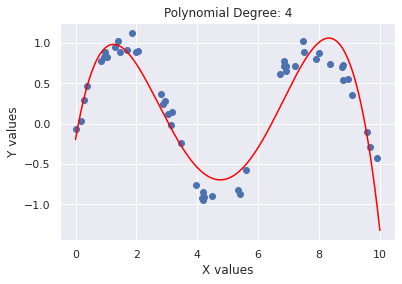

In [ ]:
polynomial_regression(4)

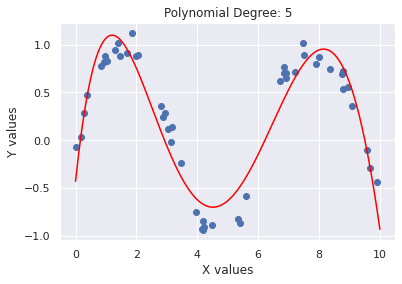

In [ ]:
polynomial_regression(5)

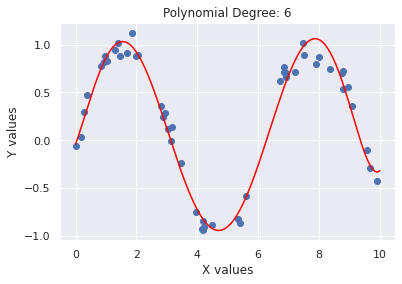

In [ ]:
polynomial_regression(6)

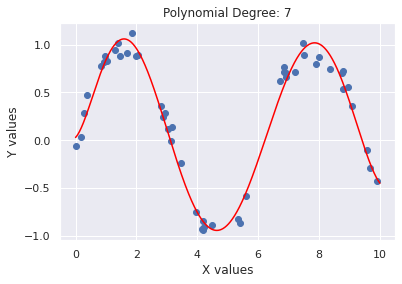

In [ ]:
polynomial_regression(7)

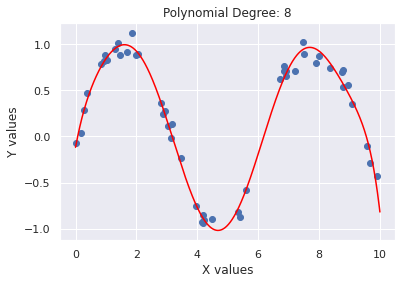

In [ ]:
polynomial_regression(8)

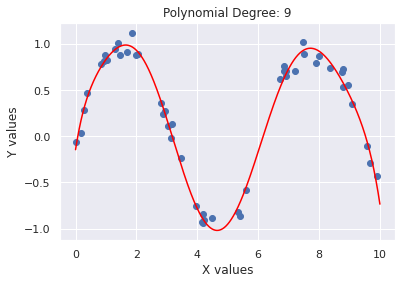

In [ ]:
polynomial_regression(9)

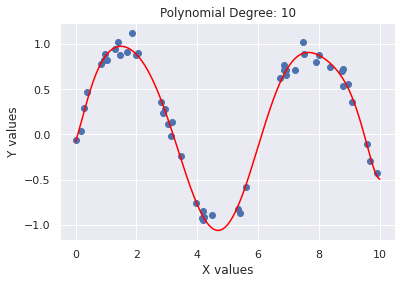

In [ ]:
polynomial_regression(10)

### Gaussian basis functions

Of course, other basis functions are possible.
For example, one useful pattern is to fit a model that is not a sum of polynomial bases, but a sum of Gaussian bases.
The result might look something like the following figure:

![Gaussian Basis function](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.06-gaussian-basis.png?raw=1)

The shaded regions in the plot are the scaled basis functions, and when added together they reproduce the smooth curve through the data.

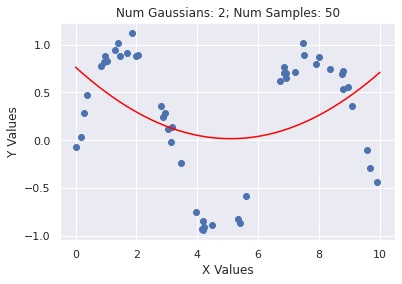

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)

def GaussianRegression(degree, num_data_points=50):
    gauss_model = make_pipeline(
        GaussianFeatures(degree),
        LinearRegression()
    )
    # Creating data (using sine wave) with random noise
    rng = np.random.RandomState(1)
    x = 10 * rng.rand(num_data_points)
    y = np.sin(x) + 0.1 * rng.randn(num_data_points)
    gauss_model.fit(x[:, np.newaxis], y)
    yfit = gauss_model.predict(xfit[:, np.newaxis])

    plt.scatter(x, y)
    plt.plot(xfit, yfit, color='red')
    plt.title(f'Num Gaussians: {degree}; Num Samples: {num_data_points}')
    plt.xlabel('X Values')
    plt.ylabel('Y Values')
    return None

GaussianRegression(2)

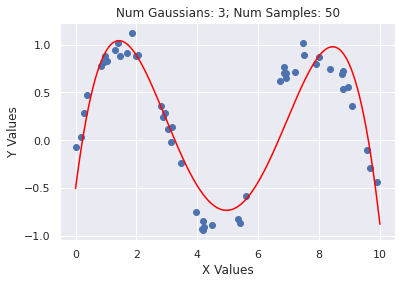

In [ ]:
GaussianRegression(3)

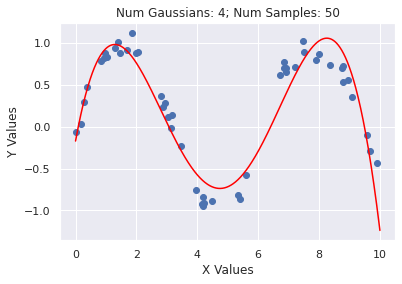

In [ ]:
GaussianRegression(4)

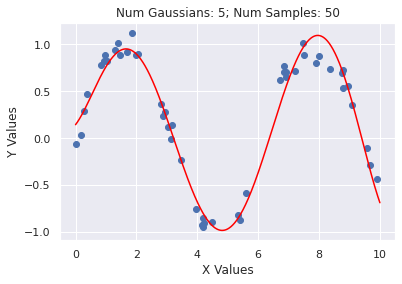

In [ ]:
GaussianRegression(5)

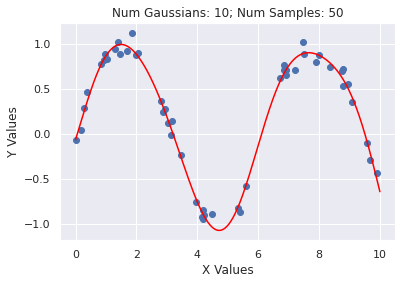

In [ ]:
GaussianRegression(10)

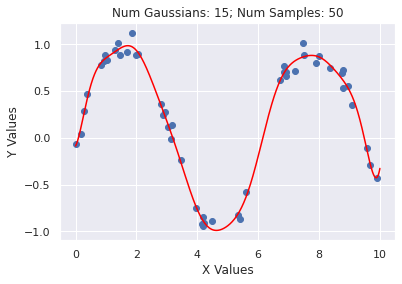

In [ ]:
GaussianRegression(15)

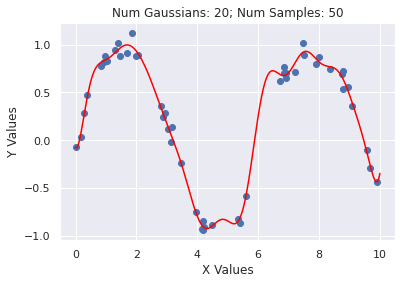

In [ ]:
GaussianRegression(20)

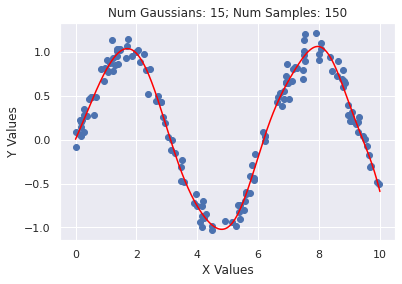

In [ ]:
GaussianRegression(15, 150)

### Overfitting
The introduction of basis functions into our linear regression makes the model much more flexible, but it also can very quickly lead to *over-fitting*.
For example, if we choose too many Gaussian basis functions, we end up with results that don't look so good:

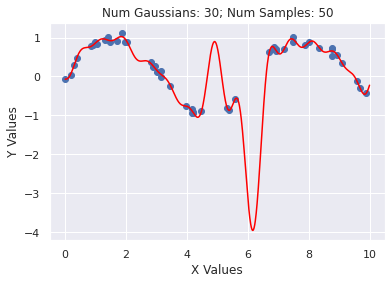

In [ ]:
GaussianRegression(30)

With the data projected to the 30-dimensional basis, the model has far too much flexibility and goes to extreme values between locations where it is constrained by data.
We can see the reason for this if we plot the coefficients of the Gaussian bases with respect to their locations:

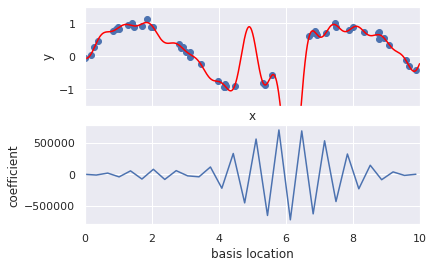

In [ ]:
def basis_plot(model, title=None):
    rng = np.random.RandomState(1)
    x = 10 * rng.rand(50)
    y = np.sin(x) + 0.1 * rng.randn(50)
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]), color='red')
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))
    
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

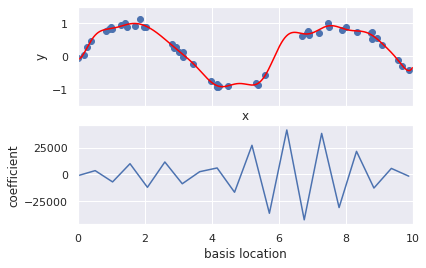

In [ ]:
model = make_pipeline(GaussianFeatures(20), LinearRegression())
basis_plot(model)

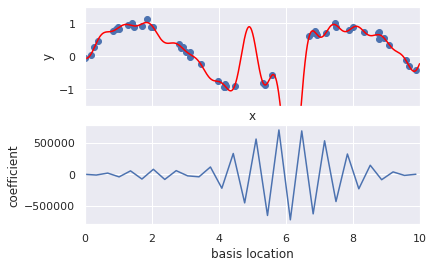

In [ ]:
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

The lower panel of this figure shows the amplitude of the basis function at each location.
This is typical over-fitting behavior when basis functions overlap: the coefficients of adjacent basis functions blow up and cancel each other out.
We know that such behavior is problematic, and it would be nice if we could limit such spikes expliticly in the model by penalizing large values of the model parameters.
Such a penalty is known as *regularization*, and comes in several forms.

# Weather Prediction using Linear Regression

We can use linear regression in various scenerios. Let us see how it works for a real world weather dataset. We first download and the data from an online source.



In [ ]:
# Downloading the Austin Weather Dataset
!wget "https://iiitaphyd-my.sharepoint.com/:x:/g/personal/cecilia_antony_research_iiit_ac_in/Efoz65abg0JKgvVE4OUytNEBOm7MtLdAljkzaf2dUVQLKw?e=l3AfUt&download=1" -O austin_weather.csv

--2022-02-05 10:36:10--  https://iiitaphyd-my.sharepoint.com/:x:/g/personal/cecilia_antony_research_iiit_ac_in/Efoz65abg0JKgvVE4OUytNEBOm7MtLdAljkzaf2dUVQLKw?e=l3AfUt&download=1
Resolving iiitaphyd-my.sharepoint.com (iiitaphyd-my.sharepoint.com)... 13.107.136.9, 13.107.138.9
Connecting to iiitaphyd-my.sharepoint.com (iiitaphyd-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/cecilia_antony_research_iiit_ac_in/Documents/CSEDU%20ML/CSEDU-ML%20B1%20Slides/Data/austin_weather.csv [following]
--2022-02-05 10:36:11--  https://iiitaphyd-my.sharepoint.com/personal/cecilia_antony_research_iiit_ac_in/Documents/CSEDU%20ML/CSEDU-ML%20B1%20Slides/Data/austin_weather.csv
Reusing existing connection to iiitaphyd-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 105734 (103K) [application/octet-stream]
Saving to: ‘austin_weather.csv’

austin_weather.csv  100%[===================>] 103.26K  --.-KB/s    i

We visualize our data as usual. Before anything, we load the data into a pandas dataframe and show the contents.

In [ ]:
# Read the data in a pandas dataframe
weather_data = pd.read_csv("austin_weather.csv")

# Display the 10 first rows
weather_data.head(10)

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,30.56,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,30.56,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,30.41,30.33,30.27,10,10,7,10,2,16,T,
5,2013-12-26,57,48,39,39,36,33,79,63,47,30.47,30.4,30.34,10,9,7,12,3,17,0,
6,2013-12-27,60,53,45,41,39,37,83,65,47,30.46,30.39,30.34,10,9,7,7,1,11,T,
7,2013-12-28,62,51,40,43,39,33,92,64,36,30.33,30.17,30.04,10,10,7,10,2,14,T,
8,2013-12-29,64,50,36,49,41,28,92,76,60,30.31,30.1,29.99,10,10,4,17,5,24,0,
9,2013-12-30,44,40,35,31,26,21,75,60,45,30.44,30.33,30.26,10,10,10,13,5,21,0,


**Cleaning the data**
The data has some days where some factors weren’t recorded. And the rainfall in cm was marked as T if there was trace precipitation. Our algorithm requires numbers, so we can’t work with alphabets popping up in our data. so we need to clean the data before applying it on our model.

In [ ]:
# some values have 'T' which denotes trace rainfall
# we need to replace all occurrences of T with 0
# so that we can use the data in our model
weather_data = weather_data.replace('T', 0.0)
  
# the data also contains '-' which indicates no 
# or NIL. This means that data is not available
# we need to replace these values as well.
weather_data = weather_data.replace('-', 0.0)

# Display the 10 first rows
weather_data.head(10)

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,30.56,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,30.56,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,30.41,30.33,30.27,10,10,7,10,2,16,0.0,
5,2013-12-26,57,48,39,39,36,33,79,63,47,30.47,30.4,30.34,10,9,7,12,3,17,0,
6,2013-12-27,60,53,45,41,39,37,83,65,47,30.46,30.39,30.34,10,9,7,7,1,11,0.0,
7,2013-12-28,62,51,40,43,39,33,92,64,36,30.33,30.17,30.04,10,10,7,10,2,14,0.0,
8,2013-12-29,64,50,36,49,41,28,92,76,60,30.31,30.1,29.99,10,10,4,17,5,24,0,
9,2013-12-30,44,40,35,31,26,21,75,60,45,30.44,30.33,30.26,10,10,10,13,5,21,0,


We take only 100 samples for simplicity. We select the samples randomly.

In [ ]:
from sklearn.utils import shuffle
weather_data = shuffle(weather_data)
# weather_data = weather_data.head(100)

As we can see, there are multiple features. However, we would like to stick to taking two features at a time to ensure we are able to plot in a 2-dimensional graph. We will be selecting two features at a time and perform linear regression. We will be selected X and Y. Here, the idea is, given X can we find Y during test time. Please see the heading in the previous table to understand which feature we are taking. We will take average dew as our X and try to predict Humidity. We will plot the data.

**Please try features you would want in the below code snippet and see how a line can be used to fit the data**

(1319,)


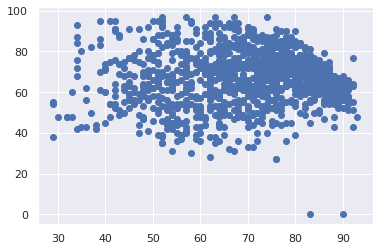

In [ ]:
feature_for_X = 'TempAvgF'
feature_for_Y = 'HumidityAvgPercent'

# Creating the X and Y for regression.
X = weather_data[feature_for_X]
Y = weather_data[feature_for_Y]

# Converting to a list
X = X.values
Y = Y.values

# Converting to a numpy array
X = np.array(X).astype(np.float)
Y = np.array(Y).astype(np.float)
print (X.shape)

# Plotting the data first
plt.scatter(X, Y)


Let us now fit a simple linear regression algorithm first.



Text(0, 0.5, 'HumidityAvgPercent')

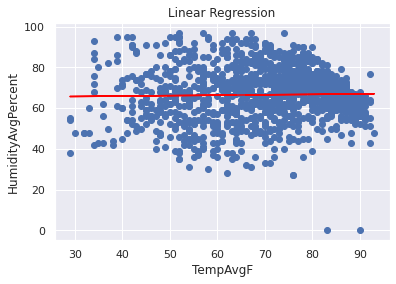

In [ ]:
# Defining a linear regression model
model = LinearRegression(fit_intercept=True)

# Training the linear regression network
model.fit(X.reshape(-1, 1),Y.reshape(-1, 1))

xfit = X.reshape(-1, 1)
yfit = model.predict(X.reshape(-1, 1))

plt.scatter(X, Y)
plt.plot(xfit, yfit, color='red')
plt.title('Linear Regression')
plt.xlabel(feature_for_X)
plt.ylabel(feature_for_Y)

# References
- https://towardsdatascience.com/animations-of-multiple-linear-regression-with-python-73010a4d7b11
- https://towardsdatascience.com/gradient-descent-animation-1-simple-linear-regression-e49315b24672
- https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/data/BicycleWeather.csv
- https://github.com/philippbauch/simple-linear-regression-notebook/blob/master/linear-regression-demo.ipynb
- https://towardsdatascience.com/animations-of-gradient-descent-and-loss-landscapes-of-neural-networks-in-python-e757f3584057
- https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.06-Linear-Regression.ipynb#scrollTo=fMopCubcRR9B